Saturation curves for SM-omics and ST<br>

Input files are generated by counting number of unique molecules and number of annotated reads per annotated region after adjusting for sequencing depth, in downsampled fastq files (proportions 0.001, 0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1) processed using ST-pipeline.<br>


In [1]:
%matplotlib inline
import os
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import glob
import warnings
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
warnings.filterwarnings('ignore')

In [2]:
def condition(row):
    """ Takes row in pandas df as input and returns type of condition
    """
    # The samples are run in triplicate based on condition
    condition = ['sm-omics', 'ST']

    if row['Name'] in ['10015CN84_D2', '10015CN84_C2', '10015CN60_E2']:
        return condition[0]
    
    elif row['Name'] in ['10005CN48_C1','10005CN48_D1','10005CN48_E1']:
        return condition[1]
    

In [3]:
# Load input files
path = '../../smomics_data'

stats_list = []

samples_list = ['10005CN48_C1', '10005CN48_D1', '10005CN48_E1', '10015CN84_D2', '10015CN84_C2', '10015CN60_E2']
    
spots_under_tissue = {'10005CN48_C1':258,
              '10005CN48_D1':252,
               '10005CN48_E1':203,
              '10015CN84_D2': 201,
              '10015CN84_C2': 241,
            '10015CN60_E2':235}
prop_list = [0.001, 0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1]
    
for filename in samples_list:
    
    cond_file = pd.read_csv(os.path.join(path, filename + '_umi_after_seq_depth_in_spots_under_outside_tissue.txt'), sep = '\t')
    if numpy.unique(cond_file['Name']) == '10005CN60_E2':
        cond_file['Name'] = '10015CN60_E2'
    print(cond_file)
    
    cond_file.sort_values(by='Num reads', inplace=True)
    cond_file['Prop_annot_reads'] = prop_list
    
    cond_file['Condition'] = cond_file.apply(lambda row: condition(row), axis = 1)
    cond_file['norm uniq mol inside'] = cond_file['UMI inside'] 
    cond_file['norm uniq mol outside'] = cond_file['UMI outside'] 

    stats_list.append(cond_file)

# Concat all files
cond_merge = pd.concat(stats_list)
    

           Name   UMI inside  UMI outside  Annot reads  Num reads
0  10005CN48_C1  3510.628159   991.379452      6071267   26844551
1  10005CN48_C1  3092.111913   868.565753      4913472   13980500
2  10005CN48_C1   252.678700    63.936986       403310    1148609
3  10005CN48_C1   737.263538   199.589041       956640    2724456
4  10005CN48_C1  1200.494585   332.165753      1522764    4332462
5  10005CN48_C1  3510.628159   991.379452      6071267   20412525
6  10005CN48_C1  3510.628159   991.379452      6071267   33276576
7  10005CN48_C1   341.682310    89.197260       505165    1438051
8  10005CN48_C1  1979.574007   551.691781      2652120    7548475
           Name   UMI inside  UMI outside  Annot reads  Num reads
0  10005CN48_D1  3408.733333  1273.743555      6621929   33276576
1  10005CN48_D1  1010.833333   367.869742      1397917    4332462
2  10005CN48_D1   192.259259    70.048847       370691    1148609
3  10005CN48_D1   610.925926   219.591588       880342    2724456
4  10005CN

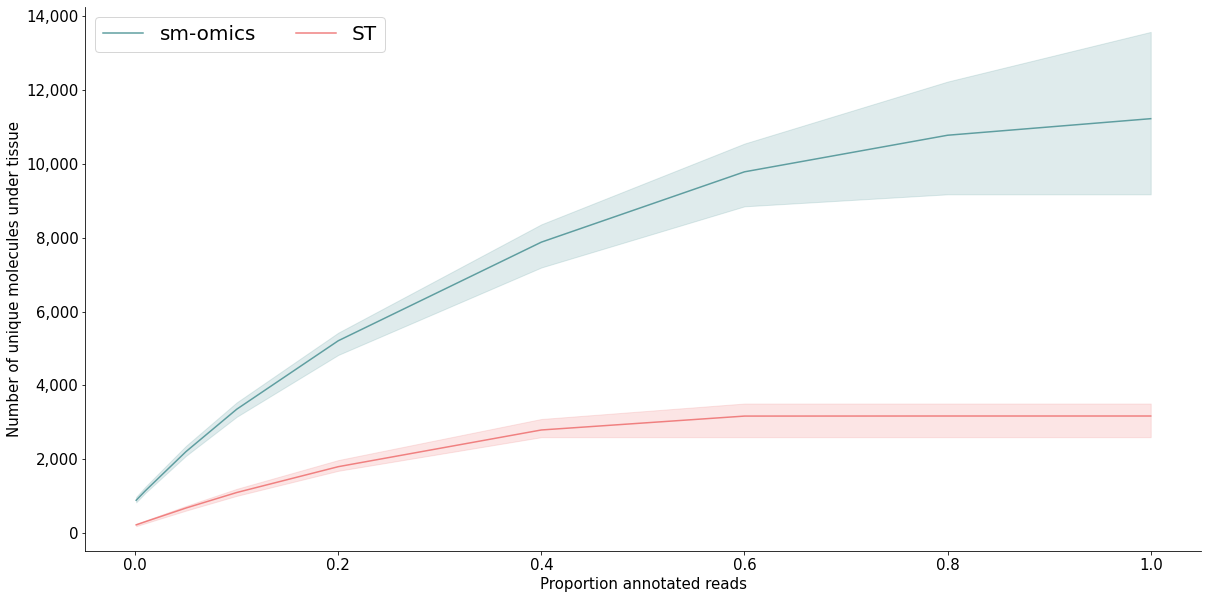

In [4]:
#Plot 
fig = plt.figure(figsize=(20, 10))
x="Prop_annot_reads"
y="norm uniq mol inside"
#y="Genes"
hue='Condition'

################ LINE PLOT

ax = sns.lineplot(x=x, y=y, data=cond_merge,hue=hue, 
                  palette =['cadetblue', 'lightcoral'], hue_order = ['sm-omics', 'ST'],ci=95)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('k')
ax.spines['left'].set_color('k')

# X and y label size
ax.set_xlabel("Proportion annotated reads", fontsize=15)
ax.set_ylabel("Number of unique molecules under tissue", fontsize=15)

# Set ticks size
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)

# change background color
back_c = 'white'
ax.set_facecolor(back_c)
ax.grid(False)

# Thousand seprator on y axis
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# LEGEND
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=['sm-omics', 'ST'],loc='upper left', ncol=2, fontsize=20)


fig.set_size_inches(20, 10)
# plt.savefig("../../figures/saturation_sm_st_total_umis_inside.pdf", transparent=True, bbox_inches = 'tight',
#      pad_inches = 0, dpi=1200)
plt.show()

In [5]:
cond_file['Prop_annot_reads'] = 100*cond_file['Prop_annot_reads']

In [6]:
#cond_merge.to_csv('../../smomics_data/sm_st_unique_molecules_under_outside_tissue.csv')

In [8]:
cond_merge

,Name,UMI inside,UMI outside,Annot reads,Num reads,Prop_annot_reads,Condition,norm uniq mol inside,norm uniq mol outside
2,10005CN48_C1,252.678700,63.936986,403310,1148609,0.001,ST,252.678700,63.936986
7,10005CN48_C1,341.682310,89.197260,505165,1438051,0.010,ST,341.682310,89.197260
3,10005CN48_C1,737.263538,199.589041,956640,2724456,0.050,ST,737.263538,199.589041
4,10005CN48_C1,1200.494585,332.165753,1522764,4332462,0.100,ST,1200.494585,332.165753
8,10005CN48_C1,1979.574007,551.691781,2652120,7548475,0.200,ST,1979.574007,551.691781
1,10005CN48_C1,3092.111913,868.565753,4913472,13980500,0.400,ST,3092.111913,868.565753
5,10005CN48_C1,3510.628159,991.379452,6071267,20412525,0.600,ST,3510.628159,991.379452
0,10005CN48_C1,3510.628159,991.379452,6071267,26844551,0.800,ST,3510.628159,991.379452
6,10005CN48_C1,3510.628159,991.379452,6071267,33276576,1.000,ST,3510.628159,991.379452
2,10005CN48_D1,192.259259,70.048847,370691,1148609,0.001,ST,192.259259,70.048847
